In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Idea 2: Customer Churn Prediction**
   ## **Data Train**

### **Business Understanding**

**About Dataset**:

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Data Sheet = WA_Fn-UseC_-Telco-Customer-Churn.csv \
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

7,043 rows × 21 columns

977.5 KB

In [ ]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
#-------------------------------------------------------------------------------------------------------------------------------
pd.set_option('display.max_columns', None )
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [ ]:
#Reading the dataset
df= pd.read_csv('/content/drive/MyDrive/2. Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Feature Summary :


* customerID: The customer's unique identification number
* gender: The customer's gender (male or female)
* SeniorCitizen: Indicates whether the customer is a senior (0 or 1)
* Partner: Indicates whether the customer has a partner (Yes or No)
* Dependents: Indicates whether the customer has dependents (Yes or No)  
* Tenure: The customer's duration of stay with the company  
* PhoneService: Indicates whether the customer has phone service (Yes or No)
* MultipleLines: Indicates whether the customer has multiple lines (Yes or No or No phone service)
* InternetService: The customer's service provider (No, DSL, or Fiber Optic)
* OnlineSecurity: Indicates whether the customer has internet security (Yes, No or No internet service)
* OnlineBackup: Indicates whether the customer has online backup (Yes, No or No internet service)
* DeviceProtection: Indicates whether the customer has device protection (Yes, No or No internet service)
* TechSupport: Indciates whether the customer has tech support (Yes, No or No internet service)
* StreamingTV: Indicates whether the customer streams TV (Yes, No or No internet service)
* StreamingMovies: Indicates whether the customer streams movies (Yes, No, or No internet service)
* Contract: The customer's current contract term (Month-to-month, One year, Two year)
* PaperlessBilling: Indicates whether the customer has paperless billing (Yes or No)
* PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The monthly amount charged to the customer
* TotalCharges: Total amount charged to the customer
* Churn: Indicates whether the customer has churn or not (Yes or No)

### Making labels concise

In [ ]:
## Shorten the Labels
value_mapper = {'Female': 'F', 'Male': 'M', 'Yes': 'Y', 'No': 'N',
                'No phone service': 'No phone', 'Fiber optic': 'FO',
                'No internet service': 'No internet', 'Month-to-month': 'Monthly',
                'Bank transfer (automatic)': 'Bank_transfer',
                'Credit card (automatic)': 'Credit_card',
                }
df.replace(to_replace=value_mapper, inplace=True)

In [ ]:
#Check info
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Y,N,1,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,29.85,29.85,N
1,5575-GNVDE,M,0,N,N,34,Y,N,DSL,Y,N,Y,N,N,N,One year,N,Mailed check,56.95,1889.5,N
2,3668-QPYBK,M,0,N,N,2,Y,N,DSL,Y,Y,N,N,N,N,Monthly,Y,Mailed check,53.85,108.15,Y
3,7795-CFOCW,M,0,N,N,45,N,No phone,DSL,Y,N,Y,Y,N,N,One year,N,Bank_transfer,42.30,1840.75,N
4,9237-HQITU,F,0,N,N,2,Y,N,FO,N,N,N,N,N,N,Monthly,Y,Electronic check,70.70,151.65,Y


### Let's also change column labels from TitleCase to lowercase to ease access.

In [ ]:
# to lowercase
df.columns = [label.lower() for label in df.columns]
df.head(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,F,0,Y,N,1,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,29.85,29.85,N
1,5575-GNVDE,M,0,N,N,34,Y,N,DSL,Y,N,Y,N,N,N,One year,N,Mailed check,56.95,1889.5,N
2,3668-QPYBK,M,0,N,N,2,Y,N,DSL,Y,Y,N,N,N,N,Monthly,Y,Mailed check,53.85,108.15,Y
3,7795-CFOCW,M,0,N,N,45,N,No phone,DSL,Y,N,Y,Y,N,N,One year,N,Bank_transfer,42.30,1840.75,N
4,9237-HQITU,F,0,N,N,2,Y,N,FO,N,N,N,N,N,N,Monthly,Y,Electronic check,70.70,151.65,Y
5,9305-CDSKC,F,0,N,N,8,Y,Y,FO,N,N,Y,N,Y,Y,Monthly,Y,Electronic check,99.65,820.5,Y
6,1452-KIOVK,M,0,N,Y,22,Y,Y,FO,N,Y,N,N,Y,N,Monthly,Y,Credit_card,89.10,1949.4,N
7,6713-OKOMC,F,0,N,N,10,N,No phone,DSL,Y,N,N,N,N,N,Monthly,N,Mailed check,29.75,301.9,N
8,7892-POOKP,F,0,Y,N,28,Y,Y,FO,N,N,Y,Y,Y,Y,Monthly,Y,Electronic check,104.80,3046.05,Y
9,6388-TABGU,M,0,N,Y,62,Y,N,DSL,Y,Y,N,N,N,N,One year,N,Bank_transfer,56.15,3487.95,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


totalcharges column is recognized as object instead of float.\
totalcharges column change to float

In [ ]:
#change to float
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: float64

seniorcitizen column is recognized as int instead of object.\
seniorcitizen column change to object.

In [ ]:
#change to object
df['seniorcitizen'] = df['seniorcitizen'].astype(object)
df['seniorcitizen'].head()

0    0
1    0
2    0
3    0
4    0
Name: seniorcitizen, dtype: object

Checking the distribution of data in missing value & outliers columns to decide whether to replace it with mean or median.

In [ ]:
#Count missing values (null)
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

totalcharges missing value = 11

In [ ]:
# Handle Missing Value and Ouliers
def handle_outliers(cols):
    sorted(cols)
    Q1, Q3 = np.percentile(cols, [25,75])
    IQR = Q3 - Q1
    lb = Q1 - (1.5*IQR)
    ub = Q3 + (1.5*IQR)
    return lb, ub

In [ ]:
for cols in df.columns:
    if df[cols].dtype != 'object':
        lr,ur = handle_outliers(df[cols])
        df.loc[df[cols] > ur, cols] = np.nan
        df.loc[df[cols] < lr, cols] = np.nan

In [ ]:
missing_cols = ['totalcharges']

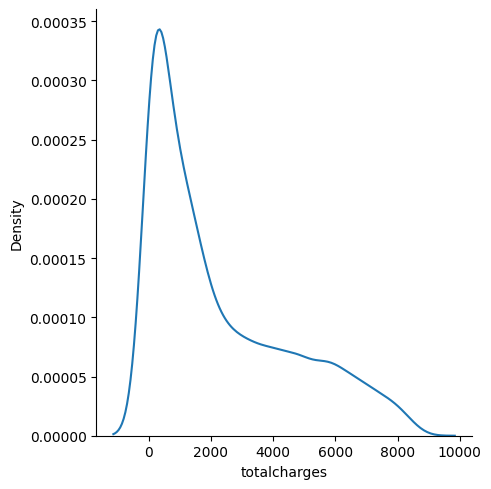

In [ ]:
for col in missing_cols:
    sns.displot(data=df, x=col, kind='kde')

In [ ]:
# Filling missing values in the current column with the median or mean
for col in missing_cols:
    if col != 'totalcharges':
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
#Count missing values (null)
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
df[np.isnan(df['totalcharges'])]


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
#Check duplicate
df.duplicated().sum()

0

In [ ]:
# Count number of unique values
df.nunique()

customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [ ]:
# Result returns true so we drop column customerid
df = df.drop('customerid', axis = 1)
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,F,0,Y,N,1.0,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,29.85,29.85,N
1,M,0,N,N,34.0,Y,N,DSL,Y,N,Y,N,N,N,One year,N,Mailed check,56.95,1889.50,N
2,M,0,N,N,2.0,Y,N,DSL,Y,Y,N,N,N,N,Monthly,Y,Mailed check,53.85,108.15,Y
3,M,0,N,N,45.0,N,No phone,DSL,Y,N,Y,Y,N,N,One year,N,Bank_transfer,42.30,1840.75,N
4,F,0,N,N,2.0,Y,N,FO,N,N,N,N,N,N,Monthly,Y,Electronic check,70.70,151.65,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,M,0,Y,Y,24.0,Y,Y,DSL,Y,N,Y,Y,Y,Y,One year,Y,Mailed check,84.80,1990.50,N
7039,F,0,Y,Y,72.0,Y,Y,FO,N,Y,Y,N,Y,Y,One year,Y,Credit_card,103.20,7362.90,N
7040,F,0,Y,Y,11.0,N,No phone,DSL,Y,N,N,N,N,N,Monthly,Y,Electronic check,29.60,346.45,N
7041,M,1,Y,N,4.0,Y,Y,FO,N,N,N,N,N,N,Monthly,Y,Mailed check,74.40,306.60,Y


### Correlations in the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
totalcharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


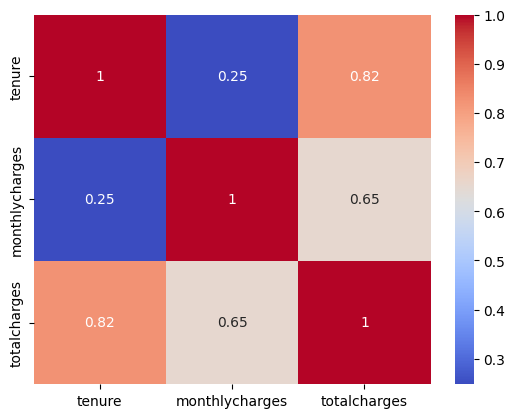

In [ ]:
# Correlation between Quantitative variable (metode corelation Pearson)
sns.heatmap(data=df[['tenure', 'monthlycharges', 'totalcharges']].corr(),
            annot=True, cmap='coolwarm');

Inference: As evident from the correlation matrix and regplots, since 'totalcharges' is the total monthly charges over the tenure of a customer, 'totalcharges' is highly correlated with 'monthlycharges' and 'tenure'.

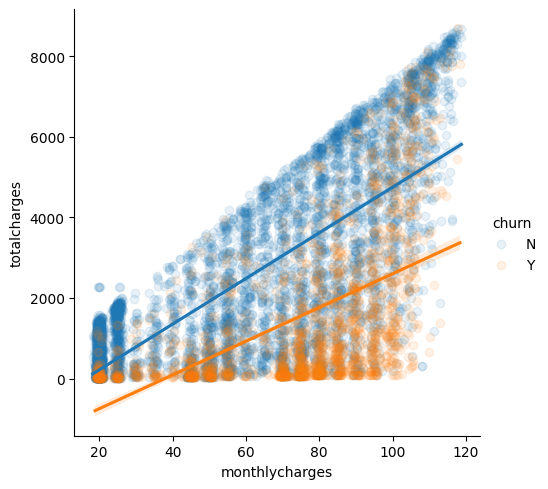

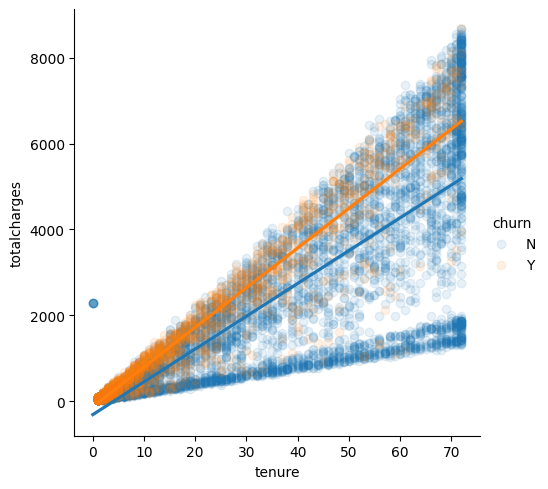

In [ ]:
# Plotting linear regression between 'monthlycharges' and 'totalcharges' while separating by 'churn' variable
sns.lmplot(x='monthlycharges', y='totalcharges', data=df, hue='churn', scatter_kws={'alpha': 0.1})

# Plotting linear regression between 'tenure' and 'totalcharges' while separating by 'churn' variable
sns.lmplot(x='tenure', y='totalcharges', data=df, hue='churn', scatter_kws={'alpha': 0.1})


Dropping TotalCharges \
We notice that both the columns tenure and MonthlyCharges are highly correlated with the column TotalCharges, which indicates that TotalCharges is the culprit. Instead of just dropping the featureTotalCharges altogether without much explaination, I think it's better if we at least provide a justification for it. \

Through some observation and domain knowledege, a customer's total accumulated charge must be at least related to the product of the customer's monthly charge and tenure. Indeed, if we plot the correlation matrix between TotalCharges and this product, which we will name EstimatedCharges, we see something interesting

      estimatedcharges  totalcharges
0                29.85         29.85
1              1936.30       1889.50
2               107.70        108.15
3              1903.50       1840.75
4               141.40        151.65
...                ...           ...
7038           2035.20       1990.50
7039           7430.40       7362.90
7040            325.60        346.45
7041            297.60        306.60
7042           6972.90       6844.50

[7043 rows x 2 columns]


<Axes: xlabel='estimatedcharges', ylabel='totalcharges'>

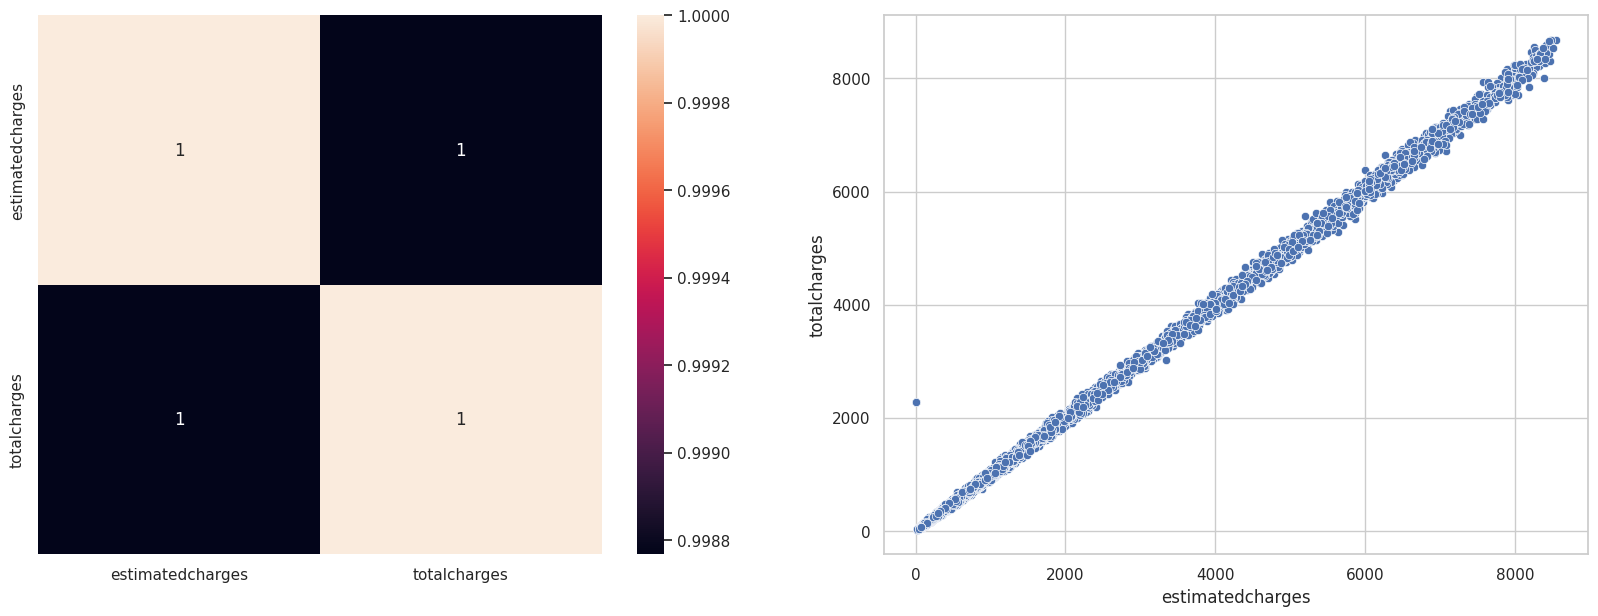

In [ ]:
# Computing the elementwise product between tenure and monthlycharges
mult = df[["monthlycharges"]].multiply(df["tenure"], axis="index")
mult = mult.rename(columns={"monthlycharges" : "estimatedcharges"})
mat = pd.concat([mult, df['totalcharges']], axis = 1)
print(mat)

plt.figure(figsize = (20,7))
sns.set(style = 'whitegrid')

# Graphing the correlation matrix
plt.subplot(1,2,1)
sns.heatmap(mat.corr(), annot = True)

# Graphing a scatterplot of all entries
plt.subplot(1,2,2)
sns.scatterplot(data = mat, x = 'estimatedcharges', y = 'totalcharges')

We see that the correlation between features EstimatedCharges and TotalCharges are identically 1, which indicates that these two features are perfectly positively correlated. Indeed, the scatterplot for these two features agrees with our analysis.

Now, should we drop the two features MonthlyCharges and tenure which makes up our EstimatedCharges, or the feature TotalCharges?

Indeed on the basis of keeping the most information available, we should drop the columnTotalCharges since we can certainly (approximately) derive this column by multiplying MontlyCharge and tenure, but we cannot derive the other two columns using TotalCharges only.

In [ ]:
#Drop totalcharges
df = df.drop('totalcharges', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


This function is designed to annotate the bars in a bar plot with the percentage of each bar's

In [ ]:
# Useful Helper Function
def annotate_percent(ax, df, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() / 2
        ax.annotate(percentage, (x,y), ha = 'center', fontsize = 15,  weight = 'bold')

Churning Rates\
We want to investigate the number of customers who have and have not churned. This will inform our decision when it comes to analyzing other categorical variables in our data

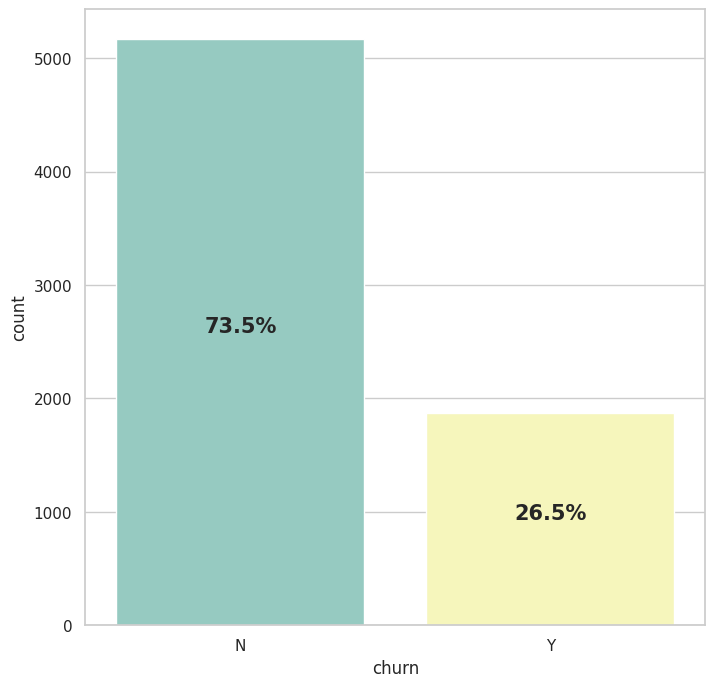

In [ ]:
# Churning Rates
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
ax = sns.countplot(data = df, x = 'churn', palette='Set3')
annotate_percent(ax, df, df.shape[0])

Customer Demographics\
We would want to identify common themes between the columns gender, seniorcitizen, partner, and dependents since it relates to the customer's personal status.

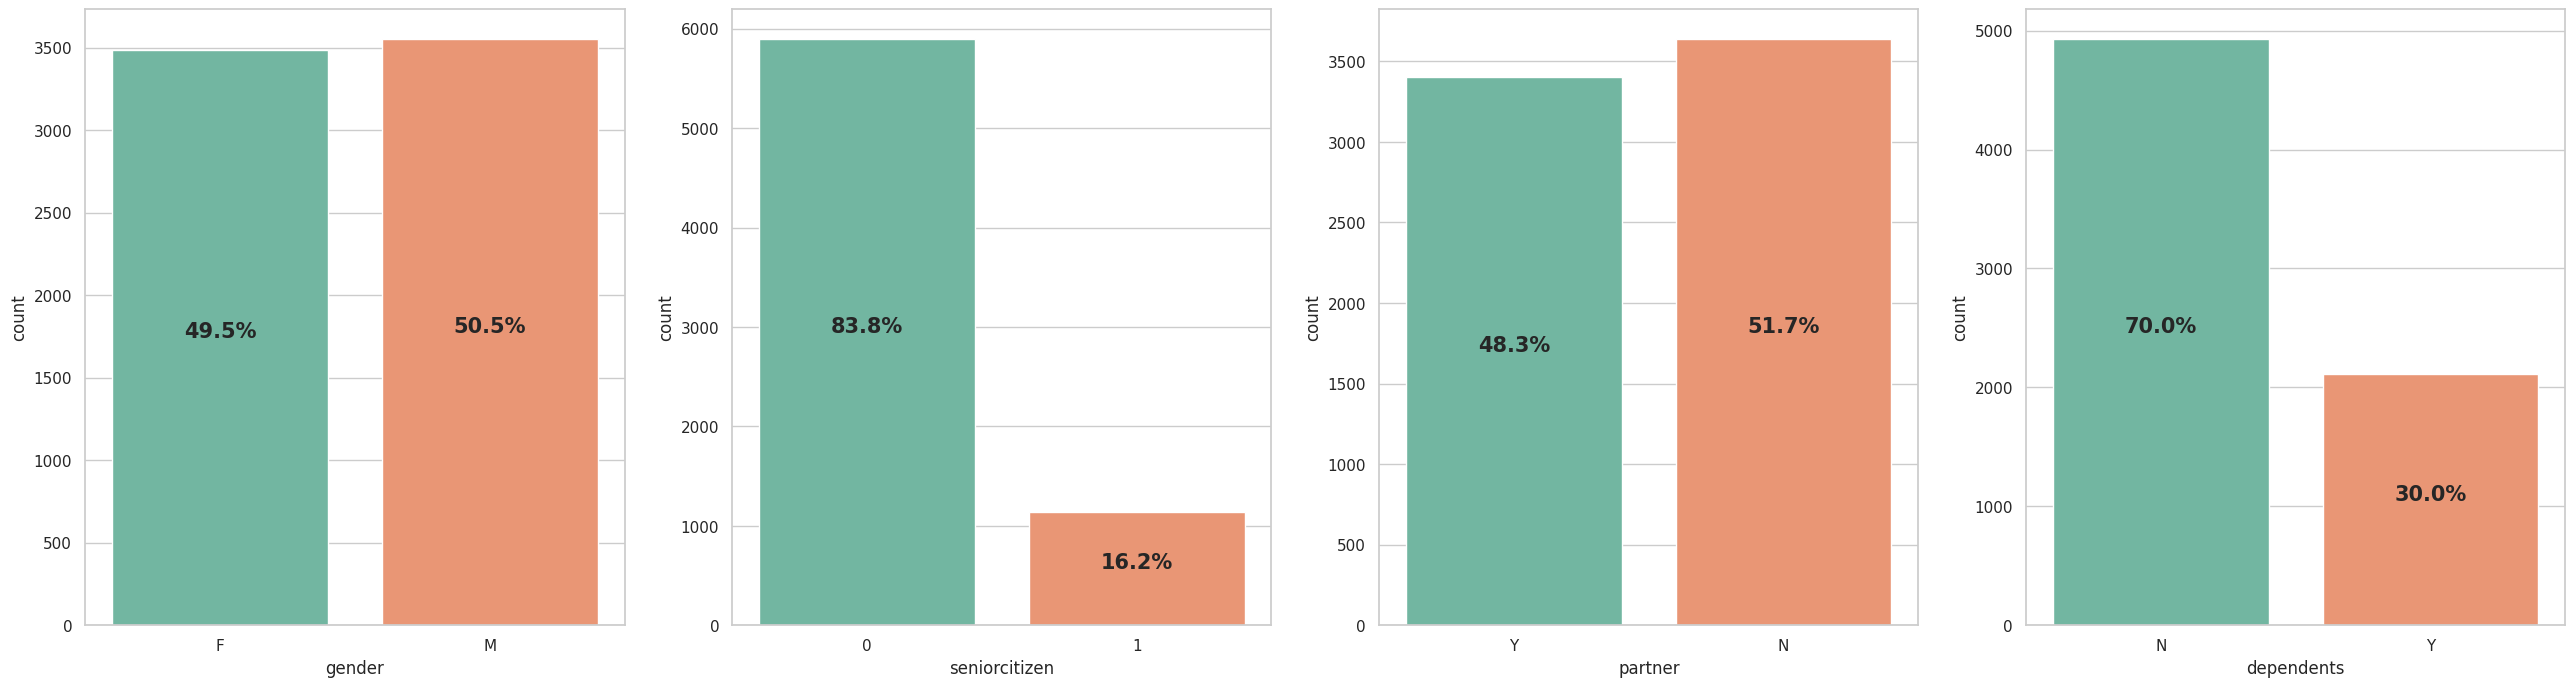

In [ ]:
# Perform a Categorical Summary
plt.figure(figsize = (32,8))
sns.set(style = 'whitegrid')

plt.subplot(1,4,1)
ax1 = sns.countplot(data = df, x = 'gender', palette='Set2')
annotate_percent(ax1, df, df.shape[0])

plt.subplot(1,4,2)
ax2 = sns.countplot(data = df, x = 'seniorcitizen', palette='Set2')
annotate_percent(ax2, df, df.shape[0])

plt.subplot(1,4,3)
ax3 = sns.countplot(data = df, x = 'partner', palette='Set2')
annotate_percent(ax3, df, df.shape[0])

plt.subplot(1,4,4)
ax4 = sns.countplot(data = df, x = 'dependents', palette='Set2')
annotate_percent(ax4, df, df.shape[0])

We would like to explore the correlation between dependents given partner, and seniorcitizen

<Axes: xlabel='seniorcitizen'>

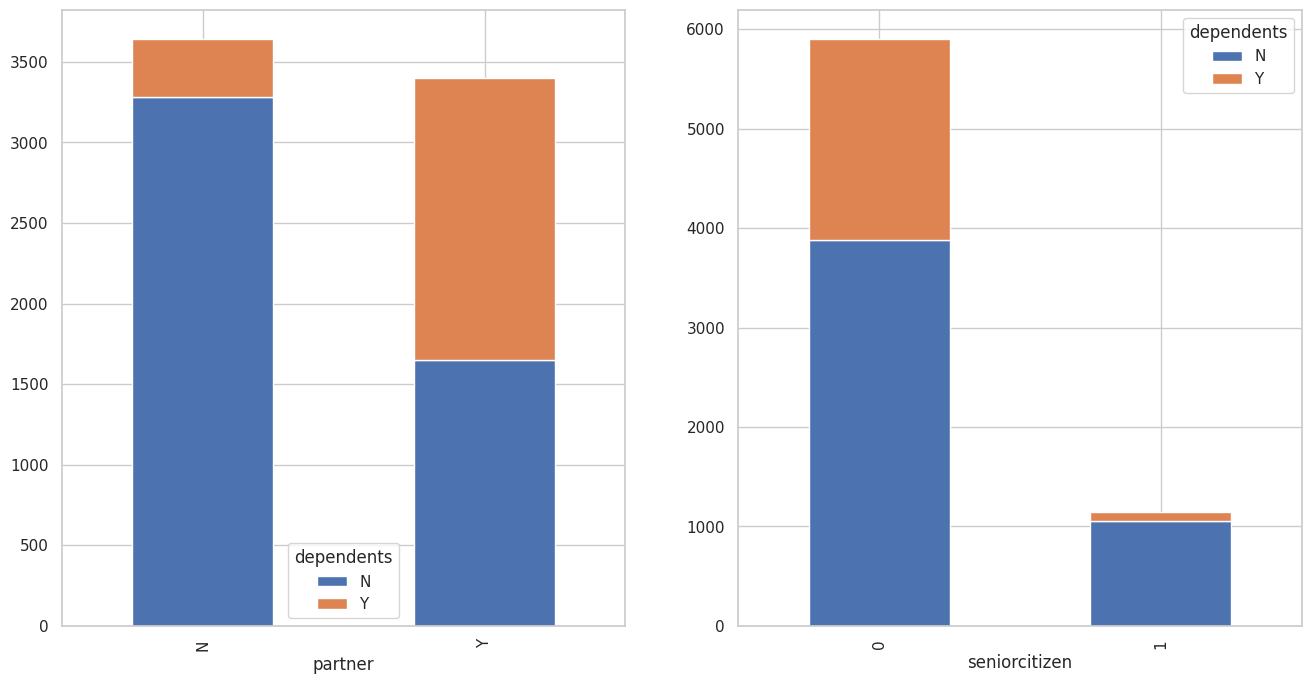

In [ ]:
# Graph the number of dependents conditioned on partners
fig, axes = plt.subplots(1,2, figsize = (16,8))

# Group Counts
count_partner = df.groupby(['partner', 'dependents']).size().unstack(fill_value = 0)
count_senior = df.groupby(['seniorcitizen', 'dependents']).size().unstack(fill_value = 0)

# Plot
count_partner.plot(kind = 'bar', stacked = True, ax = axes[0])
count_senior.plot(kind = 'bar', stacked = True, ax = axes[1])

Phone & Internet Services\
We would want to graph the number of customers who have phone and internet services (the column PhoneService and InternetService)

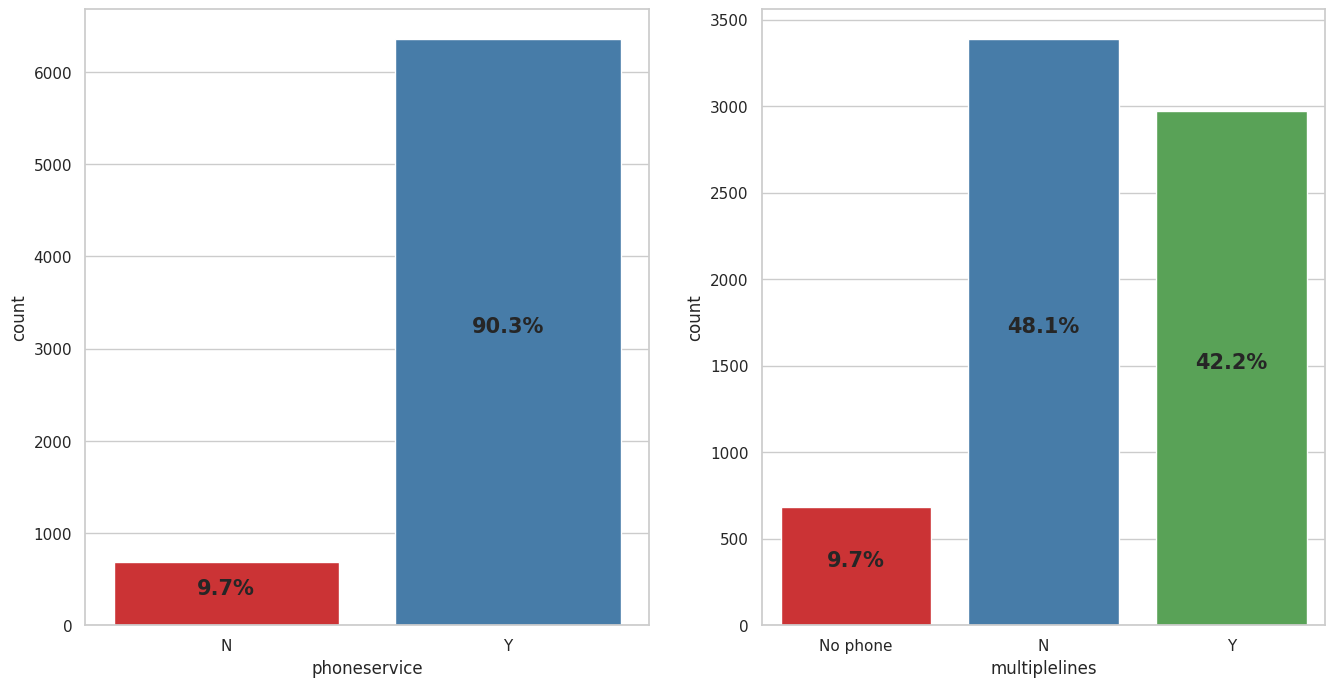

In [ ]:
# Plots of phone services
plt.figure(figsize = (16,8))
sns.set(style = 'whitegrid')

phone_cols = ['phoneservice', 'multiplelines']
df_phone = df[phone_cols]
cnt = 0

for lbl in phone_cols:
    plt.subplot(1,2,cnt + 1)
    ax = sns.countplot(data = df, x = lbl, palette='Set1')
    annotate_percent(ax, df_phone, df_phone.shape[0])
    cnt += 1

An observation shows that the percentage of customers who have phone service is the same as \
the number of people who don't have multiple lines.

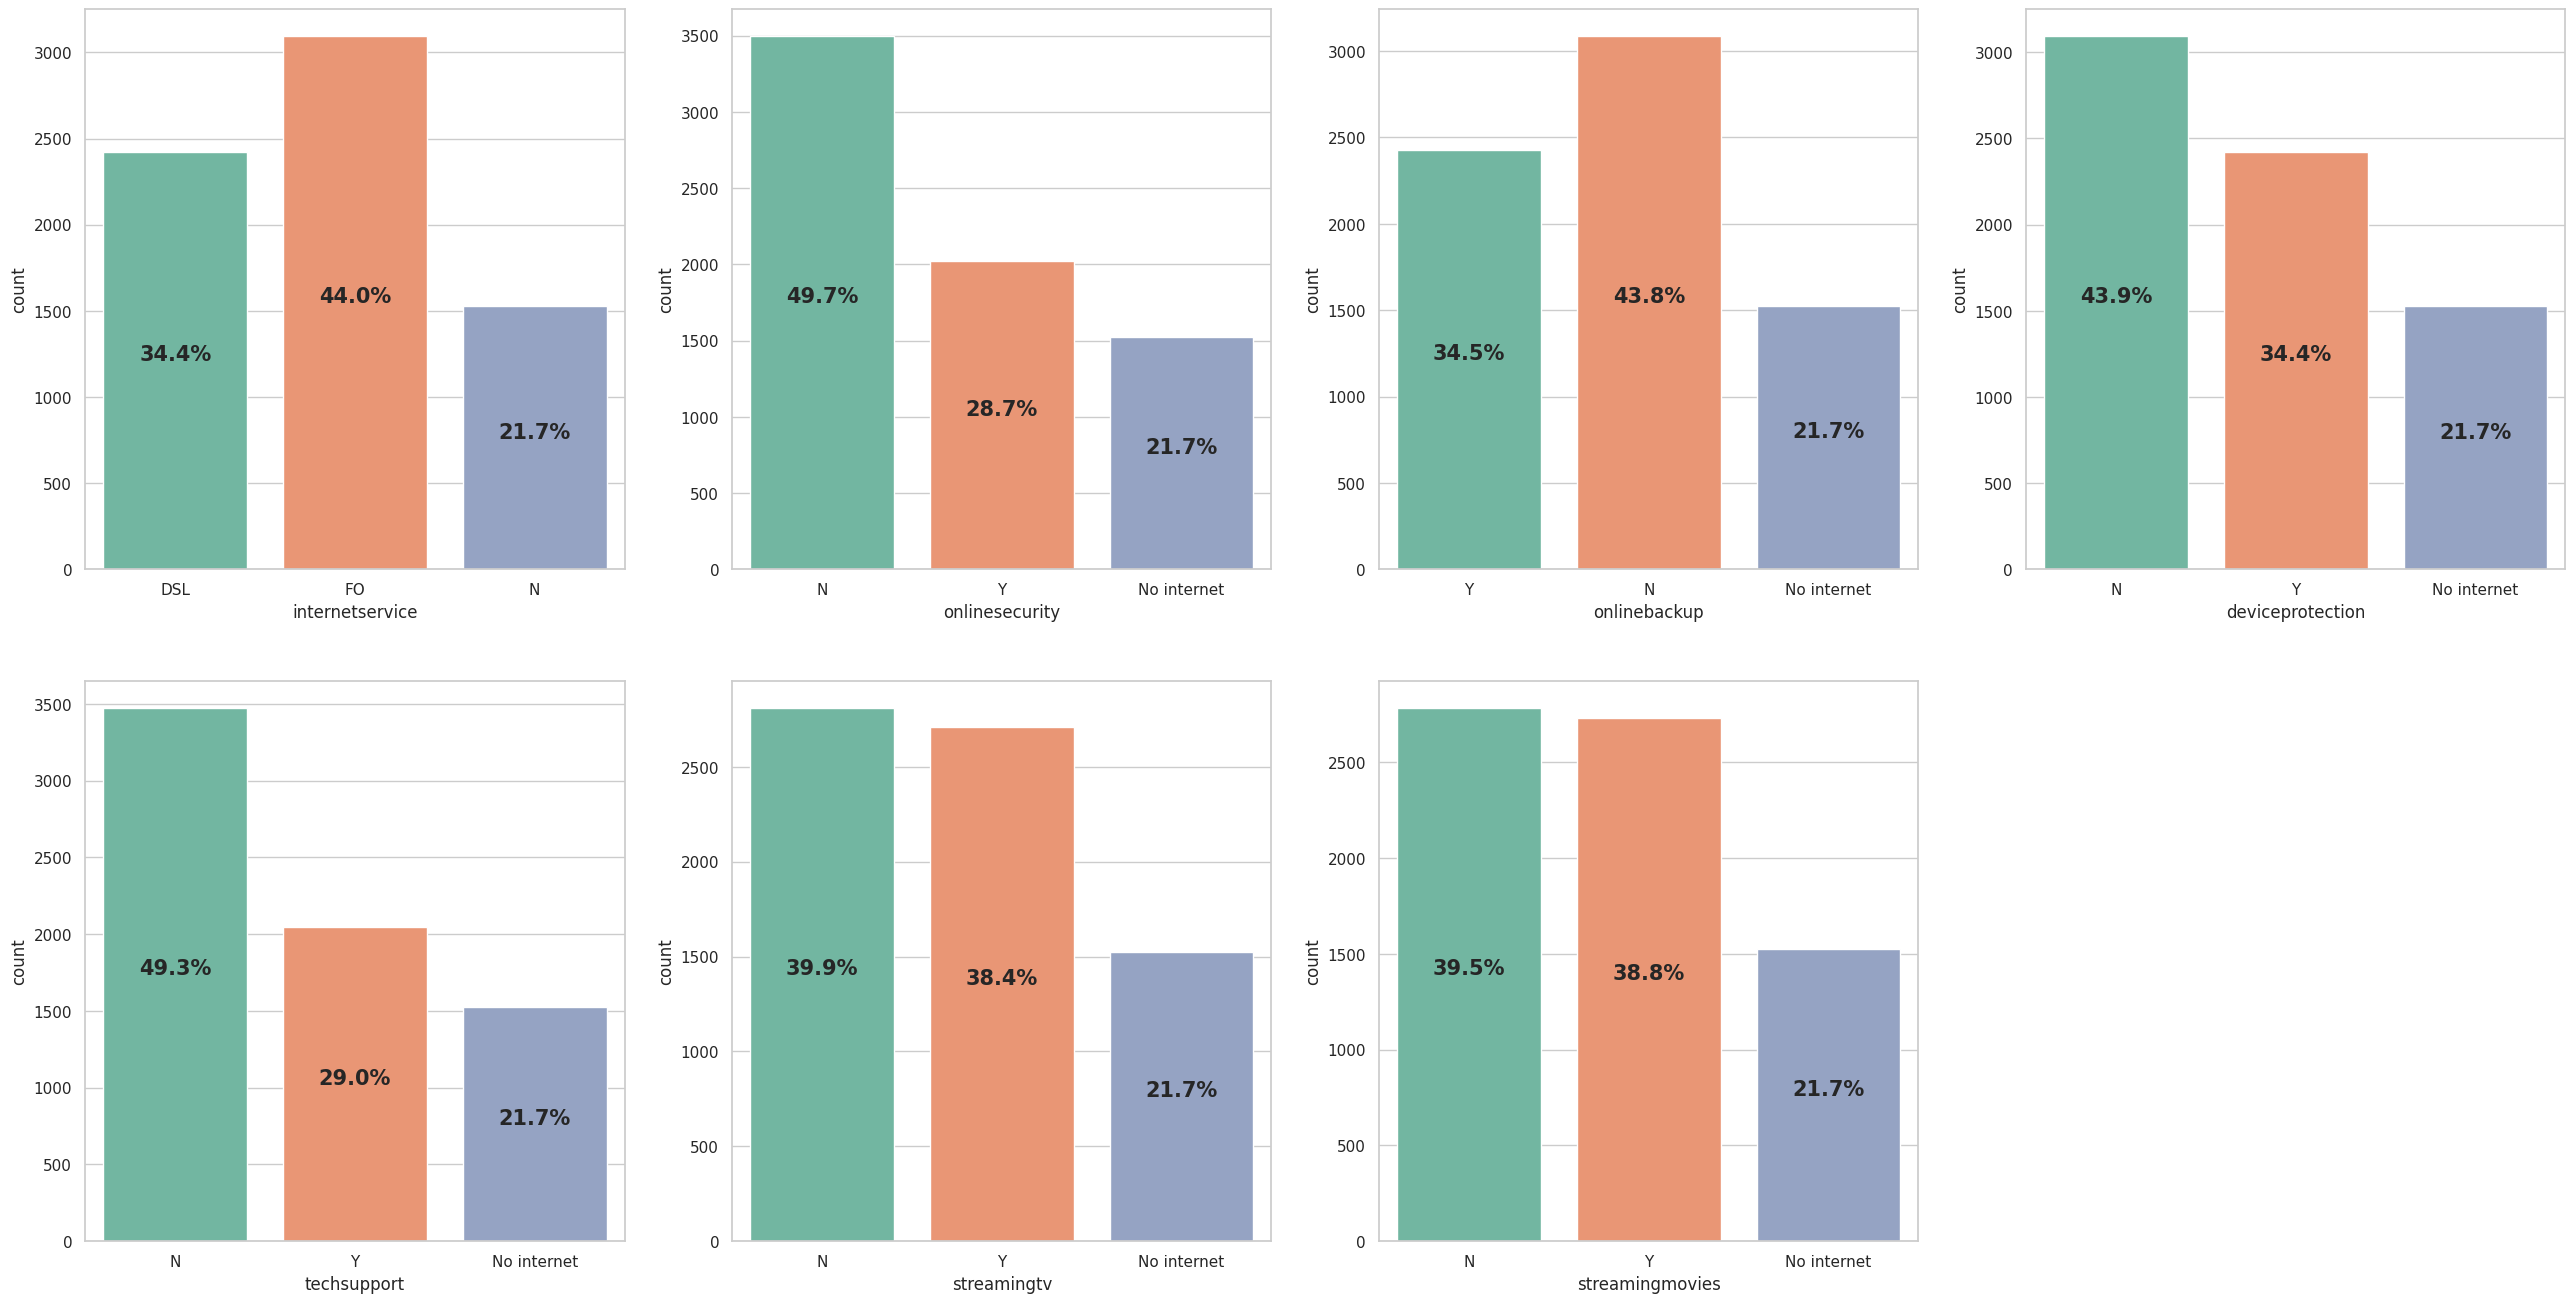

In [ ]:
# Plots of internet services

plt.figure(figsize = (32,16))
sns.set(style = 'whitegrid')

axes = []
inter_cols = ['internetservice', 'onlinesecurity', 'onlinebackup',
              'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
df_internet = df[inter_cols]
cnt = 0

for lbl in inter_cols:
    plt.subplot(2,4, cnt + 1)
    ax = sns.countplot(data = df, x = lbl, palette='Set2')
    axes.append(ax)
    annotate_percent(axes[cnt], df_internet, df_internet.shape[0])
    cnt += 1

Percentage of customers with no internet service is the same for all seven plot. This is worth investigating over.

In [ ]:
df_phone[df['phoneservice'] == 'N']

,phoneservice,multiplelines
0,N,No phone
3,N,No phone
7,N,No phone
20,N,No phone
27,N,No phone
...,...,...
7003,N,No phone
7007,N,No phone
7029,N,No phone
7036,N,No phone


In [ ]:
df_internet[df['internetservice'] == 'N']

,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
11,N,No internet,No internet,No internet,No internet,No internet,No internet
16,N,No internet,No internet,No internet,No internet,No internet,No internet
21,N,No internet,No internet,No internet,No internet,No internet,No internet
22,N,No internet,No internet,No internet,No internet,No internet,No internet
33,N,No internet,No internet,No internet,No internet,No internet,No internet
...,...,...,...,...,...,...,...
7017,N,No internet,No internet,No internet,No internet,No internet,No internet
7019,N,No internet,No internet,No internet,No internet,No internet,No internet
7020,N,No internet,No internet,No internet,No internet,No internet,No internet
7030,N,No internet,No internet,No internet,No internet,No internet,No internet


In [ ]:
# Verify our assumption for phone service
mask = ((df_phone['phoneservice'] == 'N') & (df_phone['multiplelines'] == 'No phone'))
comp = (df_phone.loc[mask] == df_phone[df['phoneservice'] == 'N'])
comp.value_counts()

phoneservice  multiplelines
True          True             682
Name: count, dtype: int64

In [ ]:
# For internet service
mask = df_internet['internetservice'] == 'N'
for lbl in inter_cols:
    if lbl != 'internetservice':
        mask = mask & (df_internet[lbl] == 'No internet')

comp = (df_internet[df_internet['internetservice'] == 'N']) == df_internet.loc[mask]
comp.value_counts()

internetservice  onlinesecurity  onlinebackup  deviceprotection  techsupport  streamingtv  streamingmovies
True             True            True          True              True         True         True               1526
Name: count, dtype: int64

As we have compared every entry in the dataframe with our condition, we can verify that indeed, if a customer has no internet service (resp. no phone service), then they cannot sign up to any additional features that requires internet service (resp. phone service) to use.

Financial Status\
Lastly, we would like to explore the number of customers with respect to contract types (column Contract), and methods of payment (columns PaperlessBilling and PaymentMethod)

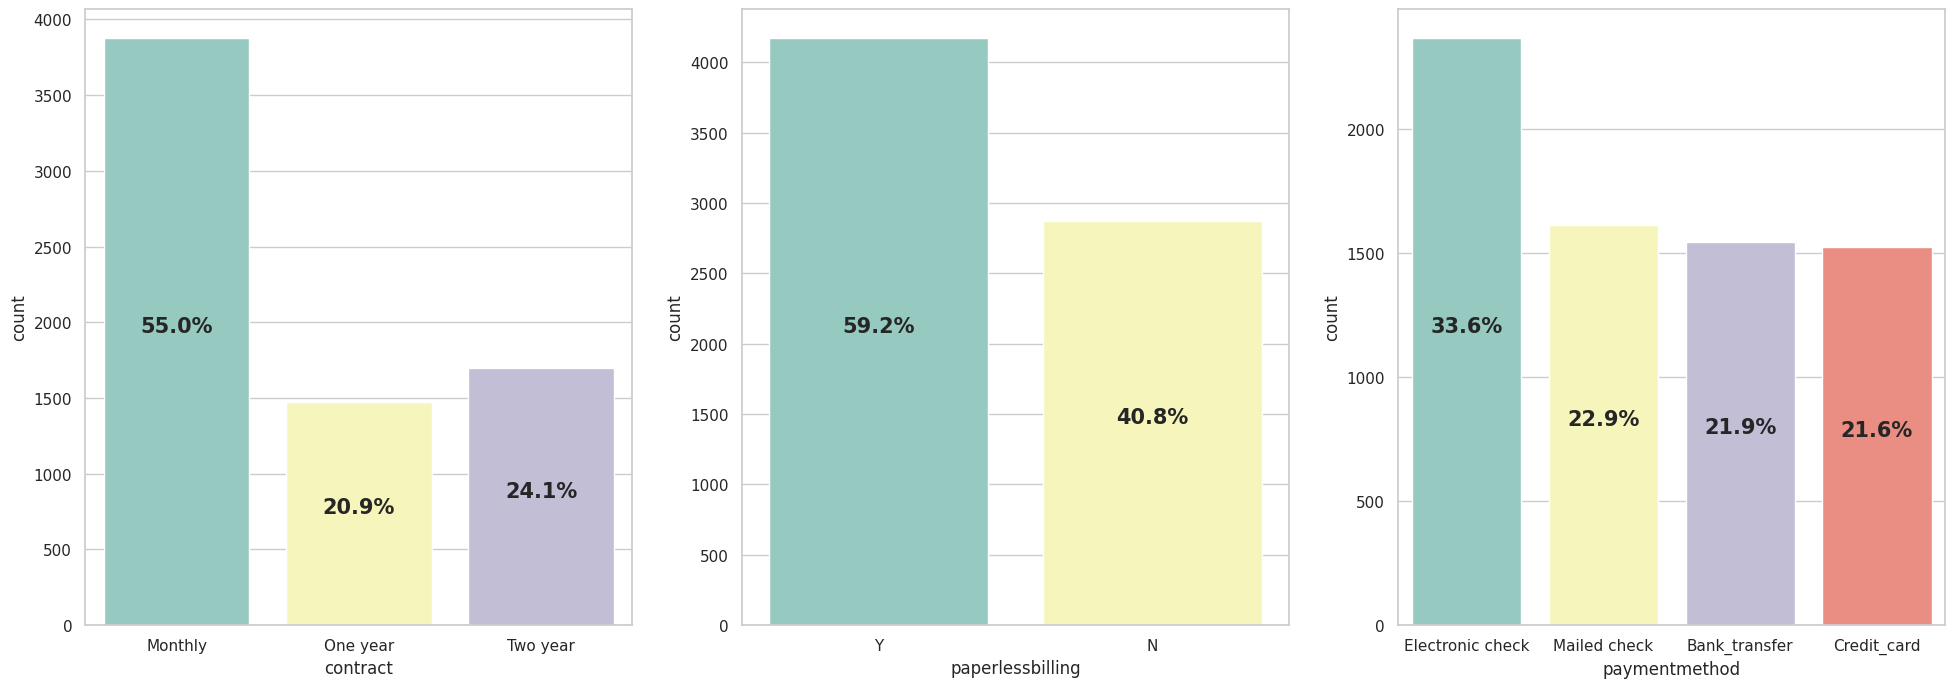

In [ ]:
# Plot relevant figures

plt.figure(figsize = (24, 8))
sns.set(style = 'whitegrid')

plt.subplot(1,3,1)
ax1 = sns.countplot(data = df, x = 'contract', palette='Set3')
annotate_percent(ax1, df, df.shape[0])

plt.subplot(1,3,2)
ax2 = sns.countplot(data = df, x = 'paperlessbilling', palette='Set3')
annotate_percent(ax2, df, df.shape[0])

plt.subplot(1,3,3)
ax3 = sns.countplot(data = df, x = 'paymentmethod', palette='Set3')
annotate_percent(ax3, df, df.shape[0])

Tenure and Types of Contract\
It is worth it to explore the types of contract in correlation to the customer's tenure in months, along with churning rates.

Text(0.5, 1.0, 'Tenure of customers with two-year contracts')

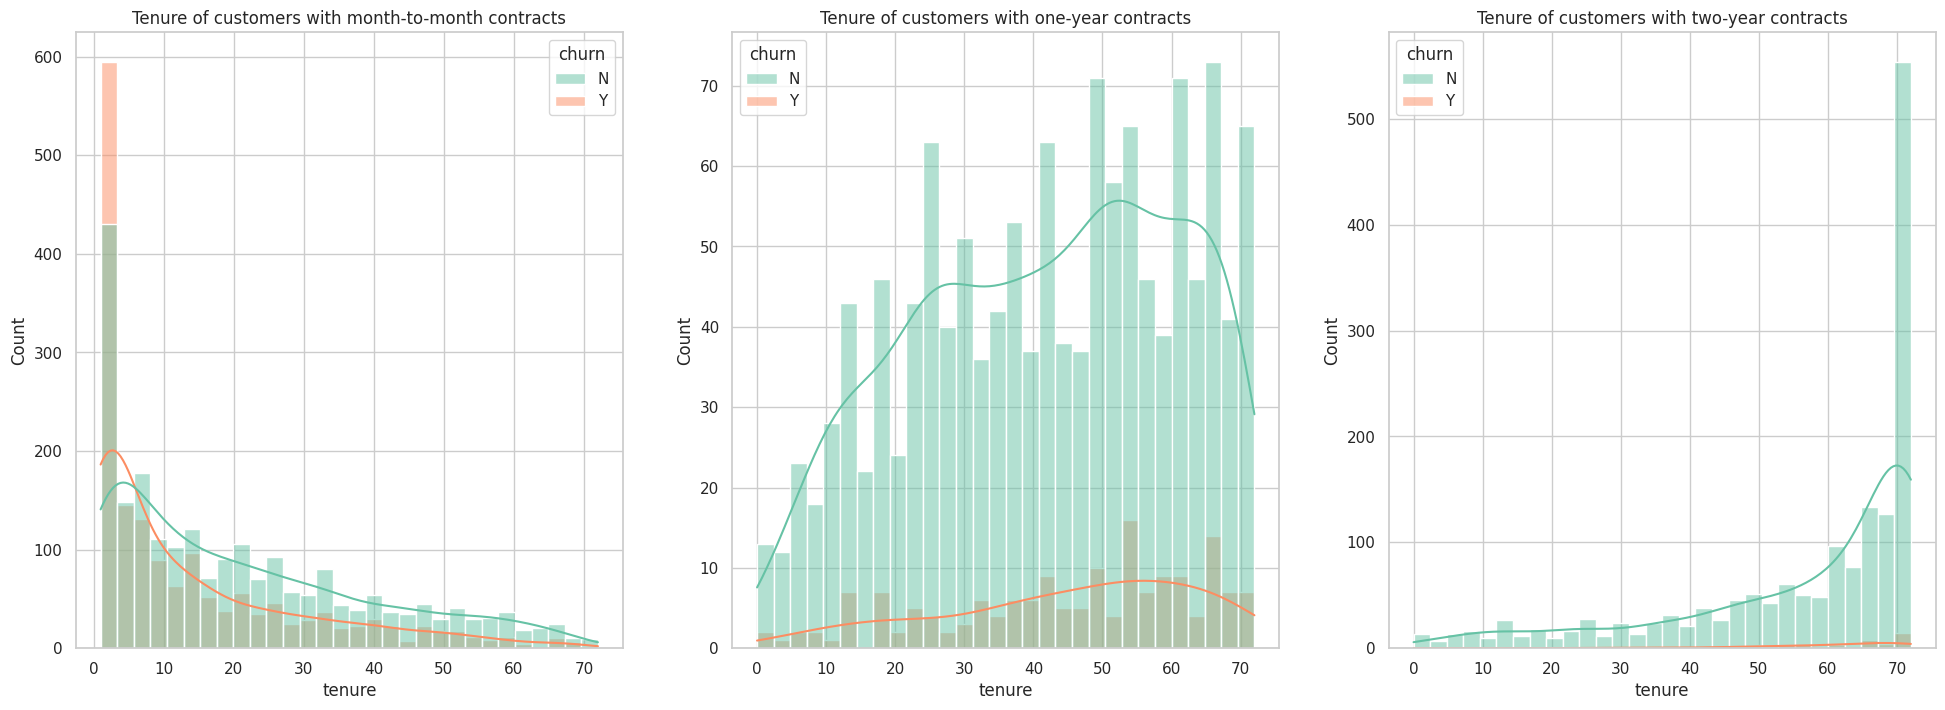

In [ ]:
plt.figure(figsize = (24,8))
sns.set(style = 'whitegrid')

plt.subplot(1,3,1)
ax1 = sns.histplot(data = df[df['contract'] == 'Monthly'], x = 'tenure', hue = 'churn', palette='Set2', bins = 30, kde = True)
ax1.set_title('Tenure of customers with month-to-month contracts')

plt.subplot(1,3,2)
ax2 = sns.histplot(data = df[df['contract'] == 'One year'], x = 'tenure', hue = 'churn', palette='Set2', bins = 30, kde = True)
ax2.set_title('Tenure of customers with one-year contracts')

plt.subplot(1,3,3)
ax3 = sns.histplot(data = df[df['contract'] == 'Two year'],  x = 'tenure', hue =  'churn', palette='Set2', bins = 30, kde = True)
ax3.set_title('Tenure of customers with two-year contracts')

Explaination\
We can see that the majority of customers with one-month-contract and short tenure are the most likely culprit for churning. The number of churning customers are especially high at the first three months since customers are not too invested in the telecom plans.

Payment Method\
For the payment method, we will analyze the number of customers that are registed for automatic payment (Bank transfer, Credit Card) or manual deposits (Electronic or Mailed Check) in relation to churning rates.

Text(0.5, 1.0, 'Payment method manual')

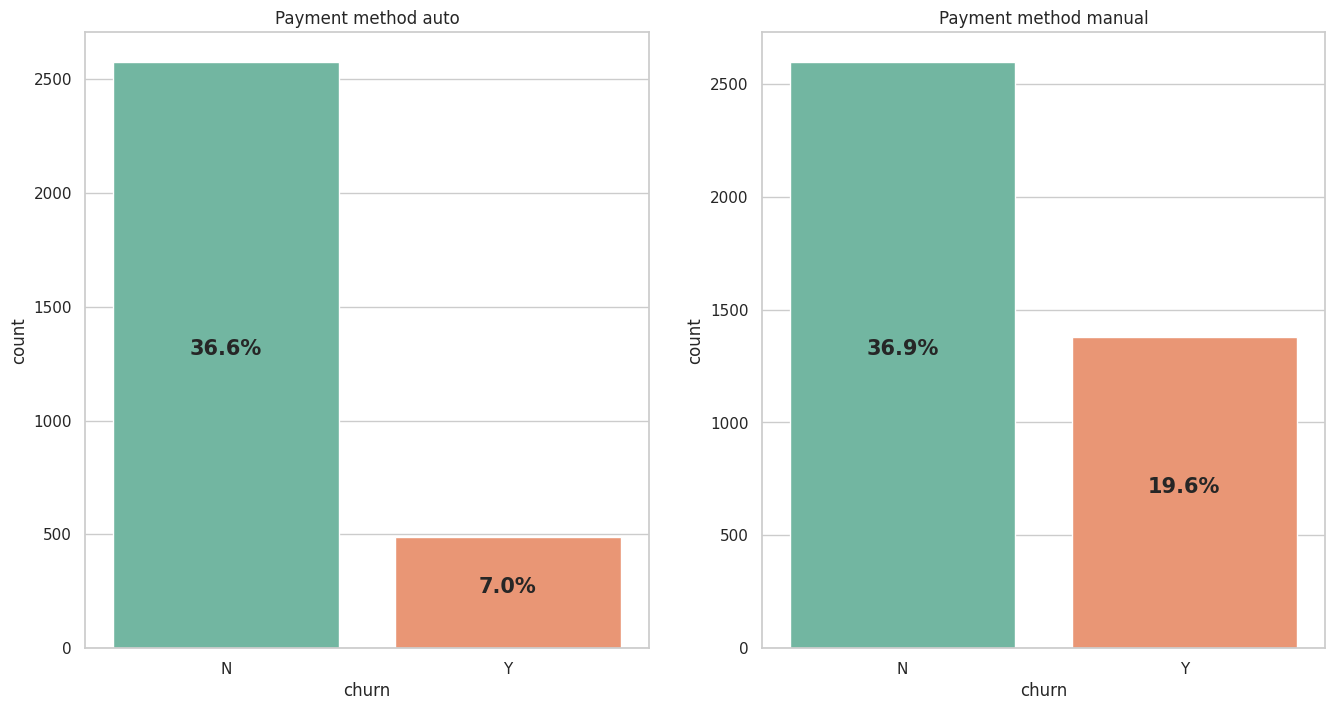

In [ ]:
# Payment Method
dt = {'Bank_transfer' : 'auto',
      'Credit_card' : 'auto',
      'Electronic check' : 'manual',
      'Mailed check' : 'manual'}
def map_payment(elem):
    return dt[elem]

payment = df['paymentmethod'].map(map_payment)
payment = pd.concat([payment, df['churn']], axis = 1)

# Plot the count of people
plt.figure(figsize = (16,8))
sns.set(style = 'whitegrid')

plt.subplot(1,2,1)
ax1 = sns.countplot(data = payment.loc[payment['paymentmethod'] == 'auto'], x = 'churn', palette='Set2')
annotate_percent(ax1, payment, payment.shape[0])
ax1.set_title('Payment method auto')

plt.subplot(1,2,2)
ax2 = sns.countplot(data = payment.loc[payment['paymentmethod'] == 'manual'], x = 'churn', palette='Set2')
annotate_percent(ax2, payment, payment.shape[0])
ax2.set_title('Payment method manual')

We can see that the number of people whose payment method are manual are 2.5 times more likely to churn compared to people who set their payment method to automatic.

In [ ]:
df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
churn               0
dtype: int64

## **Data Preprocessing**

**Boolean Feature Conversion**\
From our variable summary and type inference, we can see that some features in the dataset are of undesirable type. The list of which is as follows:

partner: object → boolean\
dependents: object → boolean\
phoneservice: object → boolean\
paperlessbilling: object → boolean\
totalcharges: object → float64
churn: object → boolean\
We proceed to convert these columns into our required type, as well as mapping features with yes/no to corresponding boolean outputs (1 and 0)

In [ ]:
# Boolean Conversion (yes/no to 1/0)
bool_map = {'N' : 0, 'Y' : 1}
bool_cols = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']

for lb in bool_cols:
    df[lb] = df[lb].map(bool_map)

# Verify that all boolean conversions are correct
for x in bool_cols:
    print(f"Feature '{x}' has unique values: {df[x].unique()}")
print(df[bool_cols].dtypes)

Feature 'partner' has unique values: [1 0]
Feature 'dependents' has unique values: [0 1]
Feature 'phoneservice' has unique values: [0 1]
Feature 'paperlessbilling' has unique values: [1 0]
Feature 'churn' has unique values: [0 1]
partner             int64
dependents          int64
phoneservice        int64
paperlessbilling    int64
churn               int64
dtype: object


**"Partially" Boolean Features**\
An observation in our dataset reveals that a number of features in our dataset is conditionally related to each other. Specifically:

If the value of the column phoneservice is No, then the value of multiplelines is guaranteed to be "No phone"\
If the value of the column internetservice is No, then the value of the columns onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, and streamingmovies is guranteed to be "No internet".

In [ ]:
# Convert SeniorCitizen back to boolean
df['seniorcitizen'] = df['seniorcitizen'].astype(int)
# Boolean Conversion (yes/no or no internet/phone service to 1/0)
bool_map_extended = {'N' : 0, 'Y' : 1, 'No internet' : 0, 'No phone' : 0}
partial_bools = ['multiplelines','onlinesecurity', 'onlinebackup', 'deviceprotection',
                 'techsupport', 'streamingtv', 'streamingmovies']

for lb in partial_bools:
    df[lb] = df[lb].map(bool_map_extended)
partial_bools.append('seniorcitizen')

# Verify that all boolean conversions are correct
for x in partial_bools:
    print(f"Feature '{x}' has unique values: {df[x].unique()}")
print(df[partial_bools].dtypes)

Feature 'multiplelines' has unique values: [0 1]
Feature 'onlinesecurity' has unique values: [0 1]
Feature 'onlinebackup' has unique values: [1 0]
Feature 'deviceprotection' has unique values: [0 1]
Feature 'techsupport' has unique values: [0 1]
Feature 'streamingtv' has unique values: [0 1]
Feature 'streamingmovies' has unique values: [0 1]
Feature 'seniorcitizen' has unique values: [0 1]
multiplelines       int64
onlinesecurity      int64
onlinebackup        int64
deviceprotection    int64
techsupport         int64
streamingtv         int64
streamingmovies     int64
seniorcitizen       int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   int64  
 3   dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   phoneservice      7043 non-null   int64  
 6   multiplelines     7043 non-null   int64  
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   int64  
 9   onlinebackup      7043 non-null   int64  
 10  deviceprotection  7043 non-null   int64  
 11  techsupport       7043 non-null   int64  
 12  streamingtv       7043 non-null   int64  
 13  streamingmovies   7043 non-null   int64  
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   int64  
 16  paymentmethod     7043 non-null   object 


**Label Encoding**\
We can see that the column InternetService is an ordinal categorical feature since we can impose an order on our \
internet service as No < DSL < Fiber optic.

The most suitable method for encoding this column is to use label encoding to suitably label these instances whilst preserving its order.

In [ ]:
# Label encode data
print(df['internetservice'].value_counts())
label_encode = {'N' : 0, 'DSL' : 1, 'FO' : 2}
df['internetservice'] = df['internetservice'].map(label_encode)
print(df['internetservice'].value_counts())

internetservice
FO     3096
DSL    2421
N      1526
Name: count, dtype: int64
internetservice
2    3096
1    2421
0    1526
Name: count, dtype: int64


# **One Hot Encoding**
We see that the rest of our categorical features, Contract and PaymentMethod, are nominal categorical with more than 2 features. Since the number of features in these columns are relatively small, we can employ One Hot Encoding on these columns to retain maximum information.

In addition, since the categories in these columns are "linearly dependent" (e.g. a contract term that is not month-to-month and one-year is two-year), we can drop the first category to ensure linearly independent columns.

In [ ]:
# One Hot Encoding
onehot_gender = pd.get_dummies(df['gender'], drop_first = True, dtype = int)
onehot_contract = pd.get_dummies(df['contract'], drop_first = True, dtype = int)
onehot_payment = pd.get_dummies(df['paymentmethod'], drop_first = True, dtype = int)
df = pd.concat([df, onehot_gender, onehot_contract, onehot_payment], axis = 1)

# Drop original columns
df = df.drop(['gender', 'contract', 'paymentmethod'], axis = 1)
df

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,M,One year,Two year,Credit_card,Electronic check,Mailed check
0,0,1,0,1.0,0,0,1,0,1,0,0,0,0,1,29.85,0,0,0,0,0,1,0
1,0,0,0,34.0,1,0,1,1,0,1,0,0,0,0,56.95,0,1,1,0,0,0,1
2,0,0,0,2.0,1,0,1,1,1,0,0,0,0,1,53.85,1,1,0,0,0,0,1
3,0,0,0,45.0,0,0,1,1,0,1,1,0,0,0,42.30,0,1,1,0,0,0,0
4,0,0,0,2.0,1,0,2,0,0,0,0,0,0,1,70.70,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24.0,1,1,1,1,0,1,1,1,1,1,84.80,0,1,1,0,0,0,1
7039,0,1,1,72.0,1,1,2,0,1,1,0,1,1,1,103.20,0,0,1,0,1,0,0
7040,0,1,1,11.0,0,0,1,1,0,0,0,0,0,1,29.60,0,0,0,0,0,1,0
7041,1,1,0,4.0,1,1,2,0,0,0,0,0,0,1,74.40,1,1,0,0,0,0,1


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('data_setelah_encoding.csv', index=False)

**Column M:**\
**0 = Female**\
**1 = Male**

**Splitting The Dataset**\
We want to first split the data into three different parts :

Training data: which is used to train the model\
Cross-Validation data: which is used later for retraining / hyperparameter tuning\
Test data: which is used to blind-test the model to measure true accuracy

We will split with stratify for the training data and the -validation data, while performing a random split on the test data to mimic the process of collecting new data.

In [ ]:
# Split data
X = df.drop('churn', axis=1)
y = df['churn']

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2, random_state=42, stratify=y_rest)

# Print shape of training, test, and cross-validation data
print(f"Training Data Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Cross-Validation Data Shape: {X_cv.shape}")
print(f"Cross-Validation Target Shape: {y_cv.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Test Target Shape: {y_test.shape}")


Training Data Shape: (4507, 21)
Training Target Shape: (4507,)
Cross-Validation Data Shape: (1127, 21)
Cross-Validation Target Shape: (1127,)
Test Data Shape: (1409, 21)
Test Target Shape: (1409,)


Handling the imbalanced nature of dataset using SMOTE resampling technique

In [ ]:
print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (7043, 21)
Before OverSampling, the shape of y: (7043,) 

Before OverSampling, counts of label '1': 1869
Before OverSampling, counts of label '0': 5174


## **SMOTE** (Synthetic Minority Over-sampling Technique)

In [ ]:
# Resampling using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())

In [ ]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (10348, 21)
After OverSampling, the shape of y: (10348,) 

After OverSampling, counts of label '1': 5174
After OverSampling, counts of label '0': 5174


In [ ]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
y_res.columns = ['churn']

balanced_df = pd.concat([X_res, y_res], axis = 1)

In [ ]:
X = balanced_df.drop(['churn'], axis=1)
y = balanced_df['churn']

Determining the best model by their success probability using CrossValidation

**LogisticRegression** vs **DecisionTreeClassifier** vs **RandomForestClassifier**

In [ ]:
# LogisticRegression
model_lr = LogisticRegression(max_iter=2000)
score_lr = round(cross_val_score(model_lr, X, y, cv=10, scoring='accuracy').mean(), 2) * 100
print("The mean accuracy score of LogisticRegression is {}%".format(score_lr))

# DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
score_dt = round(cross_val_score(model_dt, X, y, cv=10, scoring='accuracy').mean(), 2) * 100
print("The mean accuracy score of DecisionTreeClassifier is {}%".format(score_dt))

# RandomForestClassifier
model_rf = RandomForestClassifier()
score_rf = round(cross_val_score(model_rf, X, y, cv=10, scoring='accuracy').mean(), 2) * 100
print("The mean accuracy score of RandomForestClassifier is {}%".format(score_rf))


The mean accuracy score of LogisticRegression is 82.0%
The mean accuracy score of DecisionTreeClassifier is 80.0%
The mean accuracy score of RandomForestClassifier is 84.0%


## **1. LogisticRegression**

Applying **LogisticRegression with GridSearchCV** for parameter tuning

In [ ]:
# LogisticRegression with GridSearchCV for parameter tuning
model_lr = LogisticRegression()
param_grid = [{'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
grid_search = GridSearchCV(model_lr, param_grid=param_grid, cv=10)
grid_search = grid_search.fit(X, y)
grid_search.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
# Splitting data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify=y)

In [ ]:
# Logistic Regression model with best parameters
model_lr = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=2000)

# Train the model on the training data
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='newton-cg')

In [ ]:
# Predicting labels for training and testing data using logistic regression model
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

In [ ]:
# Calculating the accuracy of the model on training and testing data
train_acc = model_lr.score(X_train, y_train)
test_acc = model_lr.score(X_test, y_test)

print("Training accuracy is: ", train_acc*100)
print("Testing accuracy is :", test_acc*100)

Training accuracy is:  81.96424257066924
Testing accuracy is : 81.83574879227054


Evaluating Train and Test datasets using **Confusion Matrix and Classification Report**

<Axes: >

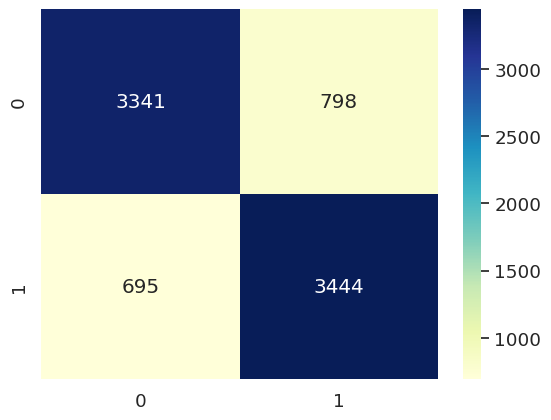

In [ ]:
# Generating confusion matrix using predicted labels for training data
cm = confusion_matrix(y_train, y_train_pred)
cm
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4139
           1       0.81      0.83      0.82      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



<Axes: >

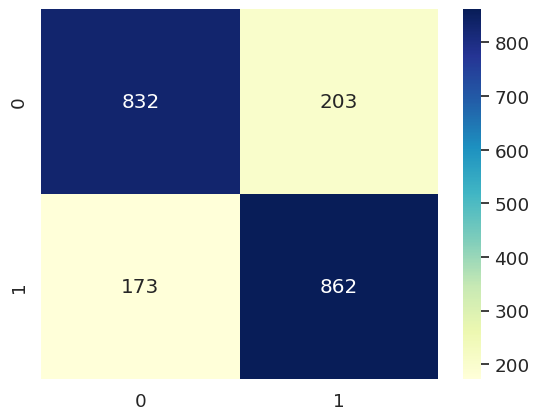

In [ ]:
# Generating confusion matrix using predicted labels for testing data
cm = confusion_matrix(y_test, y_test_pred)
cm
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1035
           1       0.81      0.83      0.82      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [ ]:
import pickle

with open('logistic.pkl', 'wb') as pickle_out:
    pickle.dump(model_lr, pickle_out)



In [ ]:
import joblib

# Simpan model dalam format joblib
joblib.dump(model_lr, 'logistic.joblib')


['logistic.joblib']

## **2. DecisionTreeClassifier**

Applying **DecisionTreeClassifier with GridSearchCV** for parameter tuning

In [ ]:
# DecisionTreeClassifier with GridSearchCV for parameter tuning
model_dt = DecisionTreeClassifier()
param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(model_dt, param_grid=param_grid_dt, cv=10)
grid_search_dt.fit(X, y)

grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
# Splitting data for DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify=y)

In [ ]:
# DecisionTreeClassifier model with best parameters
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=5)

# Train the model on the training data
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
# Predicting labels for training and testing data using DecisionTreeClassifier model
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

In [ ]:
# Calculating the accuracy of the model on training and testing data
train_acc = model_dt.score(X_train, y_train)
test_acc = model_dt.score(X_test, y_test)

print("Training accuracy is: ", train_acc*100)
print("Testing accuracy is :", test_acc*100)

Training accuracy is:  85.67286784247403
Testing accuracy is : 79.66183574879227


Evaluating Train and Test datasets using **Confusion Matrix and Classification Report**

<Axes: >

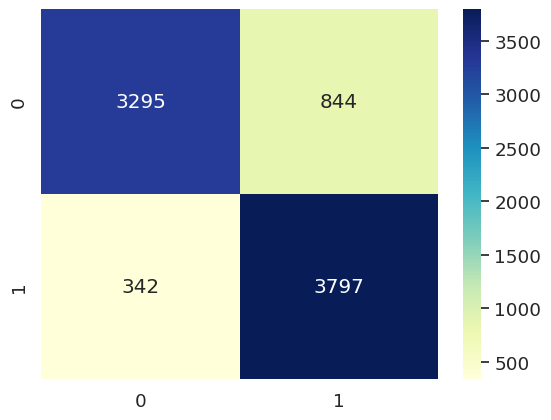

In [ ]:
# Generating confusion matrix using predicted labels for training data
cm = confusion_matrix(y_train, y_train_pred)
cm
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      4139
           1       0.82      0.92      0.86      4139

    accuracy                           0.86      8278
   macro avg       0.86      0.86      0.86      8278
weighted avg       0.86      0.86      0.86      8278



<Axes: >

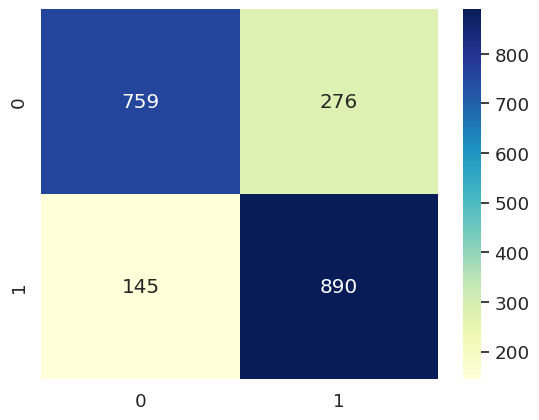

In [ ]:
# Generating confusion matrix using predicted labels for testing data
cm = confusion_matrix(y_test, y_test_pred)
cm
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1035
           1       0.76      0.86      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [ ]:
import pickle

with open('dtree.pkl', 'wb') as pickle_out:
    pickle.dump(model_dt, pickle_out)


In [ ]:
import joblib

# Simpan model dalam format joblib
joblib.dump(model_dt, 'dtree.joblib')


['dtree.joblib']

## **3. RandomForestClassifier**

Applying **RandomForestClassifier with GridSearchCV** for parameter tuning

In [ ]:
# RandomForestClassifier with GridSearchCV for parameter tuning
model_rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [10, 20, 30, None],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=10)
grid_search_rf.fit(X, y)

grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
# Splitting data for RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify=y)

In [ ]:
# RandomForestClassifier model with best parameters
model_rf = RandomForestClassifier(n_estimators= 100, max_depth=30, min_samples_leaf=1, min_samples_split=5, bootstrap=False)

In [ ]:
# Train the model on the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5)

In [ ]:
# Predicting labels for training and testing data using RandomForestClassifier model
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

In [ ]:
# Calculating the accuracy of the model on training and testing data
train_acc = model_rf.score(X_train, y_train)
test_acc = model_rf.score(X_test, y_test)

print("Training accuracy is: ", train_acc*100)
print("Testing accuracy is :", test_acc*100)

Training accuracy is:  99.57719255858903
Testing accuracy is : 84.63768115942028


Evaluating Train and Test datasets using **Confusion Matrix and Classification Report**

<Axes: >

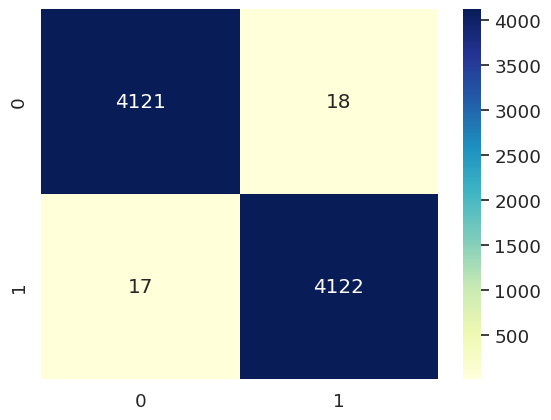

In [ ]:
# Generating confusion matrix using predicted labels for training data
cm = confusion_matrix(y_train, y_train_pred)
cm
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



<Axes: >

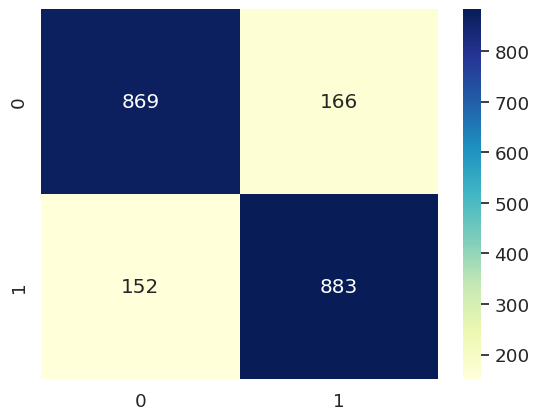

In [ ]:
# Generating confusion matrix using predicted labels for testing data
cm = confusion_matrix(y_test, y_test_pred)
cm
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.84      0.85      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [ ]:
import pickle

with open('rforest.pkl', 'wb') as pickle_out:
    pickle.dump(model_rf, pickle_out)


In [ ]:
import joblib

# Simpan model dalam format joblib
joblib.dump(model_rf, 'rforest.joblib')



['rforest.joblib']

## **Conclusion:**

**RandomForestClassifier achieved the highest accuracy of 85.0%**, making it an effective choice for Telco Customer Churn. Meanwhile, the LogisticRegression achieved an accuracy of 82.0%, showing promise as well. Both models demonstrate strong potential in detecting Telco Customer Churn. DecisionTreeClassifier achieved an accuracy of 80.0% Considerations such as model complexity and computational resources should be taken into account when selecting the most suitable algorithm for fraud detection applications.

**The below code (app.py) contains unpickling , Prediction and the inputs to our churn predictor model**

###**1. logistic (LogisticRegression)**

In [ ]:
# LogisticRegression
# file streamlit = app1.py
# file model = logistic.joblib

%%writefile app1.py

import joblib
import streamlit as st

model_file = 'logistic.joblib'

pickle_in = open(model_file, 'rb')   # Unpickling
classifier = joblib.load(pickle_in)

st.set_page_config(page_title='ChurnPredictor', page_icon="🖖")    # The set_page_config method lets us define the webpage title name and icon

@st.cache_data()
# Define the function which will make the prediction using data inputs from users
def prediction(seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
               internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
               streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
               one_year, two_year, credit_card, electronic_check, mailed_check):

    # Make predictions
    prediction = classifier.predict(
        [[seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
          internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
          streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
          one_year, two_year, credit_card, electronic_check, mailed_check]])

    if prediction == 0:
        pred = 'Everything Looks good. The Customer is Loyal!'
    else:
        pred = 'Oh No! The customer is gonna CHURN! **Better do something about it**'
    return pred

# This is the main function in which we define our webpage
def main():

    st.title("The Churn Predictor Model")   # Title of the model displayed in the webpage

    # Give a little bit information of the Model
    st.info('The Model takes in the below predictor variables for a telecom company and predicts if a customer is going to churn or not!', icon="ℹ️")

    # Create input fields
    seniorcitizen = st.number_input("Are you a senior citizen ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    partner = st.number_input("Do you have a partner ? ('1' for Yes and '0' for NO) ", min_value=0, max_value=1, value=0, step=1)
    dependents = st.number_input("Do you have any dependents ? ('1' for Yes and '0' for NO) ", min_value=0, max_value=1, value=0, step=1)
    tenure = st.number_input("Enter the months the customer (tenure) has stayed with the company(0-72)", min_value=0, max_value=72, value=10, step=3)
    phoneservice = st.number_input("Did the customer have a phone service ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    multiplelines = st.number_input("Did the customer have a multiplelines ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    internetservice = st.number_input("Did the customer have a internetservices ? ('N' : 0, 'DSL' : 1, 'FO (Fiber Optic)' : 2)", min_value=0, max_value=2, value=0, step=1)
    onlinesecurity = st.number_input("Did the customer have a onlinesecuritys ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    onlinebackup = st.number_input("Did the customer have a onlinebackup ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    deviceprotection = st.number_input("Did the customer have a deviceprotection ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    techsupport = st.number_input("Did the customer have a techsupport ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    streamingtv = st.number_input("Did the customer have a streamingtv ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    streamingmovies = st.number_input("Did the customer have a streamingmovies ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    paperlessbilling = st.number_input("Did the customer use paperless billing? ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    monthlycharges = st.number_input("Enter the monthlycharges the customer (0-118.75)", min_value=0.0, max_value=118.75, value=10.0, step=3.0)
    M = st.number_input("Are you a Male or Female ? ('1' for Male and '0' for Female)", min_value=0, max_value=1, value=0, step=1)
    one_year = st.number_input("Does the customer have One year contract ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    two_year = st.number_input("Does the customer have Two year contract ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    credit_card = st.number_input("Did the customer use Credit_card? ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    electronic_check = st.number_input("Did the customer use Electronic check ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    mailed_check = st.number_input("Did the customer use Mailed check ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)


    result = ""

    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
                            internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
                            streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
                            one_year, two_year, credit_card, electronic_check, mailed_check)
        st.success(result)
        # If the predictions are true, celebrate that the model is properly working, else spit out a churn warning
        if result == 'Everything Looks good. The Customer is Loyal!':
            st.balloons()
        else:
            st.image('https://www.smartkarrot.com/wp-content/uploads/2020/09/Customer-churn-reduction.png',
                     caption="Customer CHURN ALERT", width=150)

if __name__ == '__main__':
    main()


Writing app1.py


###**2. dtree (DecissionTree)**

In [ ]:
# DecissionTree
# file streamlit = app2.py
# file model = dtree.joblib

%%writefile app2.py

import joblib
import streamlit as st

model_file = 'dtree.joblib'

# Memuat model dengan joblib.load
classifier = joblib.load(model_file)

st.set_page_config(page_title='ChurnPredictor', page_icon="🖖")    # The set_page_config method lets us define the webpage title name and icon

@st.cache_data()
# Define the function which will make the prediction using data inputs from users
def prediction(seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
               internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
               streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
               one_year, two_year, credit_card, electronic_check, mailed_check):

    # Make predictions
    prediction = classifier.predict(
        [[seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
          internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
          streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
          one_year, two_year, credit_card, electronic_check, mailed_check]])

    if prediction == 0:
        pred = 'Everything Looks good. The Customer is Loyal!'
    else:
        pred = 'Oh No! The customer is gonna CHURN! **Better do something about it**'
    return pred

# This is the main function in which we define our webpage
def main():

    st.title("The Churn Predictor Model")   # Title of the model displayed in the webpage

    # Give a little bit information of the Model
    st.info('The Model takes in the below predictor variables for a telecom company and predicts if a customer is going to churn or not!', icon="ℹ️")

    # Create input fields
    seniorcitizen = st.number_input("Are you a senior citizen ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    partner = st.number_input("Do you have a partner ? ('1' for Yes and '0' for NO) ", min_value=0, max_value=1, value=0, step=1)
    dependents = st.number_input("Do you have any dependents ? ('1' for Yes and '0' for NO) ", min_value=0, max_value=1, value=0, step=1)
    tenure = st.number_input("Enter the months the customer (tenure) has stayed with the company(0-72)", min_value=0, max_value=72, value=10, step=3)
    phoneservice = st.number_input("Did the customer have a phone service ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    multiplelines = st.number_input("Did the customer have a multiplelines ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    internetservice = st.number_input("Did the customer have a internetservices ? ('N' : 0, 'DSL' : 1, 'FO (Fiber Optic)' : 2)", min_value=0, max_value=2, value=0, step=1)
    onlinesecurity = st.number_input("Did the customer have a onlinesecuritys ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    onlinebackup = st.number_input("Did the customer have a onlinebackup ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    deviceprotection = st.number_input("Did the customer have a deviceprotection ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    techsupport = st.number_input("Did the customer have a techsupport ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    streamingtv = st.number_input("Did the customer have a streamingtv ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    streamingmovies = st.number_input("Did the customer have a streamingmovies ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    paperlessbilling = st.number_input("Did the customer use paperless billing? ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    monthlycharges = st.number_input("Enter the monthlycharges the customer (0-118.75)", min_value=0.0, max_value=118.75, value=10.0, step=3.0)
    M = st.number_input("Are you a Male or Female ? ('1' for Male and '0' for Female)", min_value=0, max_value=1, value=0, step=1)
    one_year = st.number_input("Does the customer have One year contract ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    two_year = st.number_input("Does the customer have Two year contract ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    credit_card = st.number_input("Did the customer use Credit_card? ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    electronic_check = st.number_input("Did the customer use Electronic check ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    mailed_check = st.number_input("Did the customer use Mailed check ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)


    result = ""

    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
                            internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
                            streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
                            one_year, two_year, credit_card, electronic_check, mailed_check)
        st.success(result)
        # If the predictions are true, celebrate that the model is properly working, else spit out a churn warning
        if result == 'Everything Looks good. The Customer is Loyal!':
            st.balloons()
        else:
            st.image('https://www.smartkarrot.com/wp-content/uploads/2020/09/Customer-churn-reduction.png',
                     caption="Customer CHURN ALERT", width=150)

if __name__ == '__main__':
    main()


Writing app2.py


###**3. rforest (RandomForestClassifier)**

In [ ]:
%%writefile app3.py

import joblib
import streamlit as st

model_file = 'rforest.joblib'

pickle_in = open(model_file, 'rb')   # Unpickling
classifier = joblib.load(pickle_in)

st.set_page_config(page_title='ChurnPredictor', page_icon="🖖")    # The set_page_config method lets us define the webpage title name and icon

@st.cache_data()
# Define the function which will make the prediction using data inputs from users
def prediction(seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
               internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
               streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
               one_year, two_year, credit_card, electronic_check, mailed_check):

    # Make predictions
    prediction = classifier.predict(
        [[seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
          internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
          streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
          one_year, two_year, credit_card, electronic_check, mailed_check]])

    if prediction == 0:
        pred = 'Everything Looks good. The Customer is Loyal!'
    else:
        pred = 'Oh No! The customer is gonna CHURN! **Better do something about it**'
    return pred

# This is the main function in which we define our webpage
def main():

    st.title("The Churn Predictor Model")   # Title of the model displayed in the webpage

    # Give a little bit information of the Model
    st.info('The Model takes in the below predictor variables for a telecom company and predicts if a customer is going to churn or not!', icon="ℹ️")

    # Create input fields
    seniorcitizen = st.number_input("Are you a senior citizen ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    partner = st.number_input("Do you have a partner ? ('1' for Yes and '0' for NO) ", min_value=0, max_value=1, value=0, step=1)
    dependents = st.number_input("Do you have any dependents ? ('1' for Yes and '0' for NO) ", min_value=0, max_value=1, value=0, step=1)
    tenure = st.number_input("Enter the months the customer (tenure) has stayed with the company(0-72)", min_value=0, max_value=72, value=10, step=3)
    phoneservice = st.number_input("Did the customer have a phone service ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    multiplelines = st.number_input("Did the customer have a multiplelines ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    internetservice = st.number_input("Did the customer have a internetservices ? ('N' : 0, 'DSL' : 1, 'FO (Fiber Optic)' : 2)", min_value=0, max_value=2, value=0, step=1)
    onlinesecurity = st.number_input("Did the customer have a onlinesecuritys ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    onlinebackup = st.number_input("Did the customer have a onlinebackup ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    deviceprotection = st.number_input("Did the customer have a deviceprotection ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    techsupport = st.number_input("Did the customer have a techsupport ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    streamingtv = st.number_input("Did the customer have a streamingtv ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    streamingmovies = st.number_input("Did the customer have a streamingmovies ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    paperlessbilling = st.number_input("Did the customer use paperless billing? ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    monthlycharges = st.number_input("Enter the monthlycharges the customer (0-118.75)", min_value=0.0, max_value=118.75, value=10.0, step=3.0)
    M = st.number_input("Are you a Male or Female ? ('1' for Male and '0' for Female)", min_value=0, max_value=1, value=0, step=1)
    one_year = st.number_input("Does the customer have One year contract ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    two_year = st.number_input("Does the customer have Two year contract ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    credit_card = st.number_input("Did the customer use Credit_card? ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    electronic_check = st.number_input("Did the customer use Electronic check ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)
    mailed_check = st.number_input("Did the customer use Mailed check ? ('1' for Yes and '0' for NO)", min_value=0, max_value=1, value=0, step=1)


    result = ""

    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines,
                            internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport,
                            streamingtv, streamingmovies, paperlessbilling, monthlycharges, M,
                            one_year, two_year, credit_card, electronic_check, mailed_check)
        st.success(result)
        # If the predictions are true, celebrate that the model is properly working, else spit out a churn warning
        if result == 'Everything Looks good. The Customer is Loyal!':
            st.balloons()
        else:
            st.image('https://www.smartkarrot.com/wp-content/uploads/2020/09/Customer-churn-reduction.png',
                     caption="Customer CHURN ALERT", width=150)

if __name__ == '__main__':
    main()


Writing app3.py


In [ ]:
pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1